In [0]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

In [89]:
!unzip images.zip

Archive:  images.zip
replace images/train/mummy/1.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: images/train/mummy/1.jpeg  
 extracting: images/train/mummy/10.jpeg  
 extracting: images/train/mummy/100.jpeg  
 extracting: images/train/mummy/11.jpeg  
 extracting: images/train/mummy/12.jpeg  
 extracting: images/train/mummy/13.jpeg  
 extracting: images/train/mummy/14.jpeg  
 extracting: images/train/mummy/15.jpeg  
 extracting: images/train/mummy/16.jpeg  
 extracting: images/train/mummy/17.jpeg  
 extracting: images/train/mummy/18.jpeg  
 extracting: images/train/mummy/19.jpeg  
 extracting: images/train/mummy/2.jpeg  
 extracting: images/train/mummy/20.jpeg  
 extracting: images/train/mummy/21.jpeg  
 extracting: images/train/mummy/22.jpeg  
 extracting: images/train/mummy/23.jpeg  
 extracting: images/train/mummy/24.jpeg  
 extracting: images/train/mummy/25.jpeg  
 extracting: images/train/mummy/26.jpeg  
 extracting: images/train/mummy/27.jpeg  
 extracting: images/tra

In [43]:
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [51]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
model = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in model.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(model.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [0]:
def addTopModel(bottom_model, num_classes, D=256):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""
    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [53]:
model.input

<tf.Tensor 'input_7:0' shape=(None, 224, 224, 3) dtype=float32>

In [0]:
train = 'images/train'

In [39]:
train

'images/train'

In [47]:
model.layers

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

num_classes = 2

FC_Head = addTopModel(model, num_classes)

modelnew = Model(inputs=model.input, outputs=FC_Head)

print(modelnew.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [60]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'images/train/'
validation_data_dir = 'images/validation/'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 200 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [62]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
                   
checkpoint = ModelCheckpoint("face_recognition.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# Note we use a very small learning rate 
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 200
nb_validation_samples = 123
epochs = 3
batch_size = 16

history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

modelnew.save("face_recognition.h5")

Epoch 1/3
12/12 [==============================] - 130s 11s/step - loss: 3.9531 - accuracy: 0.5326 - val_loss: 0.0097 - val_accuracy: 0.5571

Epoch 00001: val_loss improved from inf to 0.00965, saving model to face_recognition.h5
Epoch 2/3
12/12 [==============================] - 125s 10s/step - loss: 0.4819 - accuracy: 0.7609 - val_loss: 0.0111 - val_accuracy: 0.9048

Epoch 00002: val_loss did not improve from 0.00965
Epoch 3/3
12/12 [==============================] - 128s 11s/step - loss: 0.2330 - accuracy: 0.9076 - val_loss: 0.0019 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00965 to 0.00186, saving model to face_recognition.h5


In [0]:
from keras.models import load_model

classifier = load_model('face_recognition.h5')

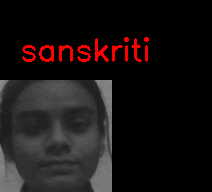

In [87]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
images_dict = {"[0]": "mom", 
                      "[1]": "sanskriti",
                      }

images_dict_n = {"sanskriti": "sanskriti", 
                      "mummy": "mom",
                      }



img = cv2.imread('9.jpeg')
input_original = img.copy()
input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_LINEAR)
img = img / 255.
img = img.reshape(1,224,224,3) 
res = np.argmax(classifier.predict(img, 1, verbose = 0), axis=1)

face = images_dict[str(res)]
BLACK = [0,0,0]
expanded_image = cv2.copyMakeBorder(input_original, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
cv2.putText(expanded_image, face, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
cv2_imshow( expanded_image)

In [68]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow
images_dict = {"[0]": "sanskriti", 
                      "[1]": "mom",
                      }

images_dict_n = {"sanskriti": "sanskriti", 
                      "mummy": "mom",
                      }

def draw_test(name, pred, im):
    face = images_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, face, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + images_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,10):
    input_im = getRandomImage("images/validation/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Class - sanskriti


DisabledFunctionError: ignored